In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set()

# Кластеризация методом k-средних

Алгоритмы кластеризации нацелены на то, чтобы найти, исходя из
свойств данных, оптимальное разбиение или дискретную маркировку групп точек.

Алгоритм k-средних выполняет поиск заранее заданного количества кластеров в немаркированном многомерном наборе данных. Достигается это с помощью простого
представления о том, что такое оптимальная кластеризация.
- «Центр кластера» — арифметическое среднее всех точек, относящихся к этому
кластеру.
- Каждая точка ближе к центру своего кластера, чем к центрам других кластеров.

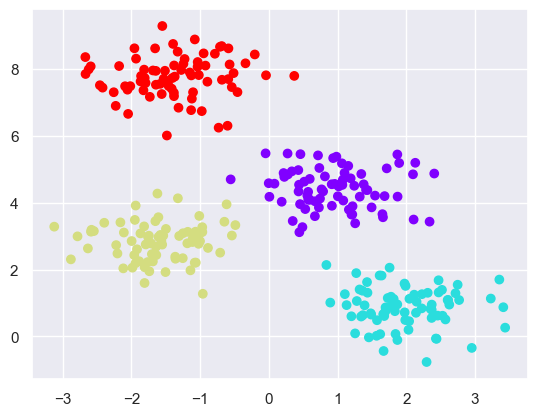

In [11]:
# сгенерируем набор данных, содержащий 4 отдельных "пятна"
from sklearn.datasets import make_blobs
X, y = make_blobs(300, centers=4, cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')

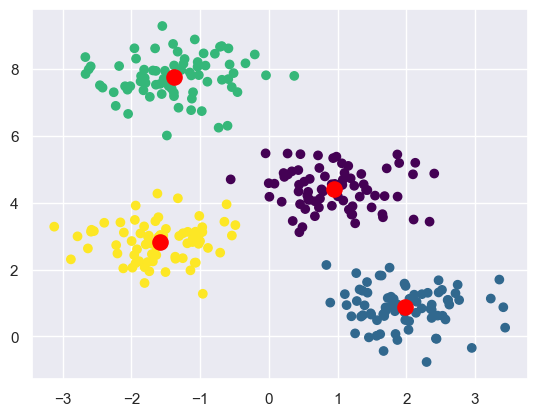

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_means = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_means, cmap='viridis')

# центры кластеров
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=120)

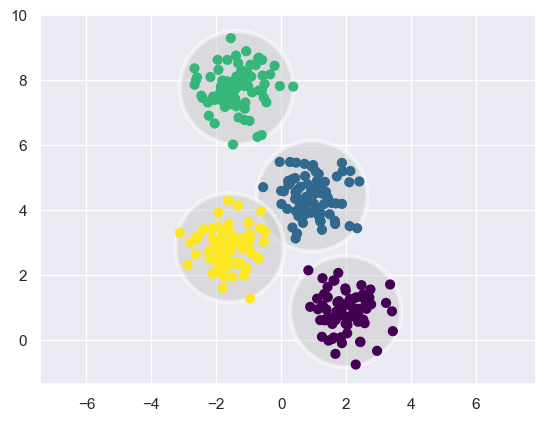

In [15]:
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
   
    # Выводим на рисунок входные данные
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    
    # Выводим на рисунок представление модели k-средних
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
            for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

### Максимизация математического ожидания (expectation-maximization, EM).

Максимизация математического ожидания (EM) — мощный алгоритм, встречающийся во множестве контекстов науки о данных. Метод k-средних — особенно простое
и понятное приложение этого алгоритма. 

1. Выдвигаем гипотезу о центрах кластеров.
2. Повторяем до достижения сходимости:
- E-шаг: приписываем точки к ближайшим центрам кластеров. E-шаг, или шаг ожидания (expectation), назван так потому, что включает актуализацию математического ожидания того, к каким кластерам относятся точки. 
- M-шаг: задаем новые центры кластеров в соответствии со средними значениями. M-шаг, или шаг максимизации (maximization), назван так потому, что включает максимизацию некоторой целевой функции, описывающей расположения центров кластеров.

Визуализация EM-алгоритма для метода k-средних
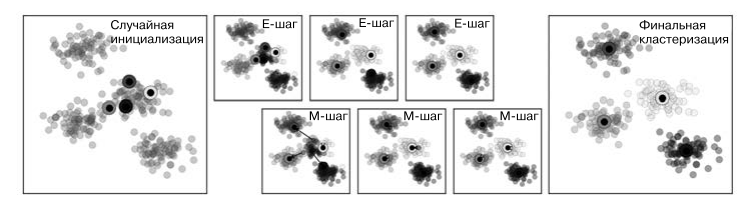

## Ядерный метод k-средних

Использует граф ближайших соседей для вычисления представления данных более высокой размерности, после чего задает соответствие меток с помощью алгоритма k-средних.

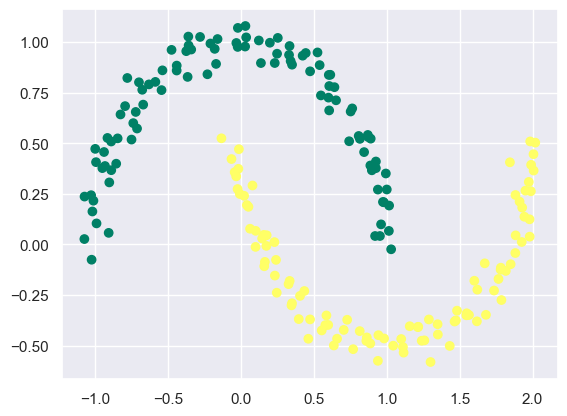

In [5]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')

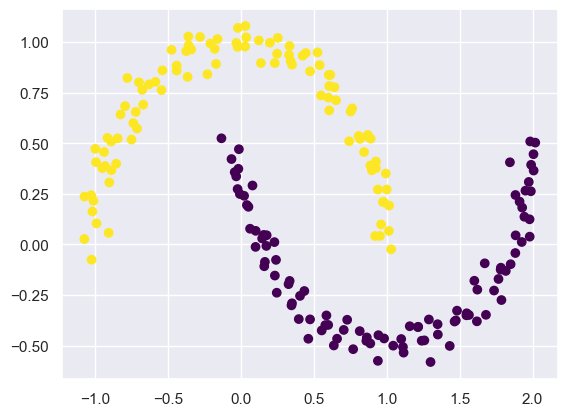

In [6]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

# Резюме

- Глобально оптимальный результат может оказаться недостижимым в принципе. Во-первых, хотя процедура EM гарантированно улучшает результат на каждом шаге, уверенности в том, что она ведет к глобально наилучшему решению, нет.
- Количество кластеров следует выбирать заранее. Еще одна часто встречающаяся проблема с методом k-средних заключается в том, что ему необходимо сообщить, какое количество кластеров вы ожидаете: он не умеет вычислять количество кластеров на основе данных.
- Метод k-средних работает довольно медленно в случае большого количества выборок. Алгоритм может работать довольно медленно при росте числа выборок, ведь при каждой итерации методу k-средних необходимо обращаться к каждой точке в наборе данных. Но существует класс sklearn.cluster.MiniBatchKMeans, в котором можно применить лишь подмножество данных для корректировки центров кластеров на каждом шаге.

Также отсутствие гибкости в вопросе формы кластеров и отсутствие вероятностного
присвоения меток кластеров — два недостатка метода k-средних, означающих, что
для многих наборов данных (особенно низкоразмерных) он будет работать не столь
хорошо, как хотелось бы.

## t-SNE

Воспользуемся для предварительной обработки данных до выполнения k-средних алгоритмом стохастического вложения соседей на основе распределения Стьюдента (t-SNE). t-SNE — нелинейный алгоритм вложения, особенно хорошо умеющий сохранять точки внутри кластеров. 

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tr = tsne.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X_tr)

## MiniBatchKMeans

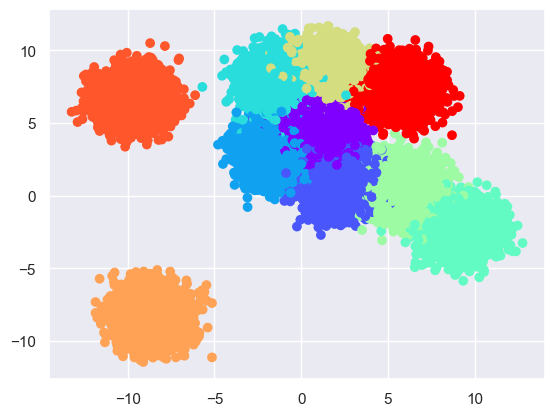

In [16]:
X, y = make_blobs(30000, centers=10, cluster_std=1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')

In [17]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=10)
kmeans.fit(X)
centers = kmeans.cluster_centers_[kmeans.predict(X)]
centers

array([[ 1.15609670e+00,  4.36411554e+00],
       [ 2.11026431e+00,  8.10612988e-01],
       [ 5.87064687e+00,  5.60878010e-01],
       ...,
       [ 5.40195395e+00,  7.44872381e+00],
       [-1.79587157e-03,  8.28481185e+00],
       [-1.16110157e+00,  2.25566320e+00]])

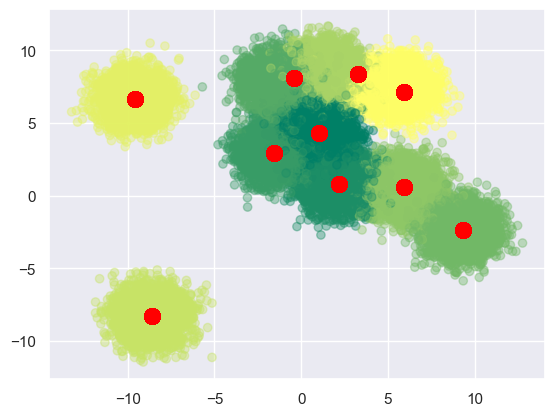

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer', alpha=0.4)
plt.scatter(centers[:, 0], centers[:, 1], s=120, c='red')